In [1]:
# Import packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# Imports various modules from the scikit-learn library 
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix

In [3]:
# Reads the CSV file called "BankChurners.csv" 
credit_card_user_churn_data = pd.read_csv('BankChurners.csv', na_values='NaN')

In [4]:
# View first few rows of the dataframe 
credit_card_user_churn_data.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,769911858,Existing Customer,40,F,4,High School,NaN,Less than $40K,Blue,34,...,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000


In [5]:
# View information of the dataframe 
credit_card_user_churn_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CLIENTNUM                 10127 non-null  int64  
 1   Attrition_Flag            10127 non-null  object 
 2   Customer_Age              10127 non-null  int64  
 3   Gender                    10127 non-null  object 
 4   Dependent_count           10127 non-null  int64  
 5   Education_Level           8608 non-null   object 
 6   Marital_Status            9378 non-null   object 
 7   Income_Category           10127 non-null  object 
 8   Card_Category             10127 non-null  object 
 9   Months_on_book            10127 non-null  int64  
 10  Total_Relationship_Count  10127 non-null  int64  
 11  Months_Inactive_12_mon    10127 non-null  int64  
 12  Contacts_Count_12_mon     10127 non-null  int64  
 13  Credit_Limit              10127 non-null  float64
 14  Total_

# Preprocessing

In [6]:
# Get the count of null values in each column
credit_card_user_churn_data.isnull().sum()

CLIENTNUM                      0
Attrition_Flag                 0
Customer_Age                   0
Gender                         0
Dependent_count                0
Education_Level             1519
Marital_Status               749
Income_Category                0
Card_Category                  0
Months_on_book                 0
Total_Relationship_Count       0
Months_Inactive_12_mon         0
Contacts_Count_12_mon          0
Credit_Limit                   0
Total_Revolving_Bal            0
Avg_Open_To_Buy                0
Total_Amt_Chng_Q4_Q1           0
Total_Trans_Amt                0
Total_Trans_Ct                 0
Total_Ct_Chng_Q4_Q1            0
Avg_Utilization_Ratio          0
dtype: int64

<AxesSubplot:>

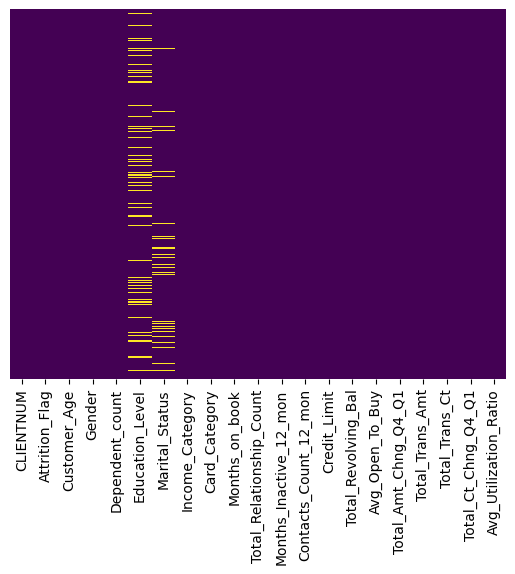

In [7]:
# Graphically show the null values in the columns
sns.heatmap(credit_card_user_churn_data.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [8]:
# Drop "CLIENTNUM" column
credit_card_user_churn_data=credit_card_user_churn_data.drop('CLIENTNUM',axis=1)

In [9]:
# Remove any rows with missing values in the "Marital_Status" column to ensure data integrity and consistency for further analysis
credit_card_user_churn_data.dropna(subset=['Marital_Status'], inplace=True)

In [10]:
# View the shape of the dataframe
credit_card_user_churn_data.shape

(9378, 20)

In [11]:
# View first 10 rows in the dataframe
credit_card_user_churn_data.head(10)

,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
4,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000
5,Existing Customer,44,M,2,Graduate,Married,$40K - $60K,Blue,36,3,1,2,4010.0,1247,2763.0,1.376,1088,24,0.846,0.311
6,Existing Customer,51,M,4,NaN,Married,$120K +,Gold,46,6,1,3,34516.0,2264,32252.0,1.975,1330,31,0.722,0.066
8,Existing Customer,37,M,3,Uneducated,Single,$60K - $80K,Blue,36,5,2,0,22352.0,2517,19835.0,3.355,1350,24,1.182,0.113
9,Existing Customer,48,M,2,Graduate,Single,$80K - $120K,Blue,36,6,3,3,11656.0,1677,9979.0,1.524,1441,32,0.882,0.144
11,Existing Customer,65,M,1,NaN,Married,$40K - $60K,Blue,54,6,2,3,9095.0,1587,7508.0,1.433,1314,26,1.364,0.174
12,Existing Customer,56,M,1,College,Single,$80K - $120K,Blue,36,3,6,0,11751.0,0,11751.0,3.397,1539,17,3.250,0.000


In [12]:
# Replace null values in the "Education_Level" column with the mode value
mode_education_level = credit_card_user_churn_data['Education_Level'].mode()[0]
credit_card_user_churn_data['Education_Level'].fillna(mode_education_level, inplace=True)

In [13]:
# View the shape of the dataframe after replacing "Education_Level" column with the mode value
credit_card_user_churn_data.shape

(9378, 20)

In [14]:
# View first 10 rows in the dataframe after replacing "Education_Level" column with the mode value
credit_card_user_churn_data.head()

,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
4,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000
5,Existing Customer,44,M,2,Graduate,Married,$40K - $60K,Blue,36,3,1,2,4010.0,1247,2763.0,1.376,1088,24,0.846,0.311


In [15]:
# Get the count of null values in each column after preprocessing
credit_card_user_churn_data.isnull().sum()

Attrition_Flag              0
Customer_Age                0
Gender                      0
Dependent_count             0
Education_Level             0
Marital_Status              0
Income_Category             0
Card_Category               0
Months_on_book              0
Total_Relationship_Count    0
Months_Inactive_12_mon      0
Contacts_Count_12_mon       0
Credit_Limit                0
Total_Revolving_Bal         0
Avg_Open_To_Buy             0
Total_Amt_Chng_Q4_Q1        0
Total_Trans_Amt             0
Total_Trans_Ct              0
Total_Ct_Chng_Q4_Q1         0
Avg_Utilization_Ratio       0
dtype: int64

In [16]:
# View the value count in "Income_Category" column
credit_card_user_churn_data['Income_Category'].value_counts()

Less than $40K    3311
$40K - $60K       1658
$80K - $120K      1399
$60K - $80K       1300
abc               1030
$120K +            680
Name: Income_Category, dtype: int64

In [17]:
# Replace 'abc' values with NaN in the "Income_Category" column
credit_card_user_churn_data['Income_Category'] = credit_card_user_churn_data['Income_Category'].replace('abc', np.nan)

# Replace null values in the "Income_Category" column with the mode value
mode_income_category = credit_card_user_churn_data['Income_Category'].mode()[0]
credit_card_user_churn_data['Income_Category'] = credit_card_user_churn_data['Income_Category'].fillna(mode_income_category)

In [18]:
# View the value count in "Income_Category" column after replacing "abc" values with "NaN" and "NaN" replace with mode value
credit_card_user_churn_data['Income_Category'].value_counts()

Less than $40K    4341
$40K - $60K       1658
$80K - $120K      1399
$60K - $80K       1300
$120K +            680
Name: Income_Category, dtype: int64

In [19]:
credit_card_user_churn_data.shape

(9378, 20)

In [20]:
credit_card_user_churn_data.head(10)

,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
4,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000
5,Existing Customer,44,M,2,Graduate,Married,$40K - $60K,Blue,36,3,1,2,4010.0,1247,2763.0,1.376,1088,24,0.846,0.311
6,Existing Customer,51,M,4,Graduate,Married,$120K +,Gold,46,6,1,3,34516.0,2264,32252.0,1.975,1330,31,0.722,0.066
8,Existing Customer,37,M,3,Uneducated,Single,$60K - $80K,Blue,36,5,2,0,22352.0,2517,19835.0,3.355,1350,24,1.182,0.113
9,Existing Customer,48,M,2,Graduate,Single,$80K - $120K,Blue,36,6,3,3,11656.0,1677,9979.0,1.524,1441,32,0.882,0.144
11,Existing Customer,65,M,1,Graduate,Married,$40K - $60K,Blue,54,6,2,3,9095.0,1587,7508.0,1.433,1314,26,1.364,0.174
12,Existing Customer,56,M,1,College,Single,$80K - $120K,Blue,36,3,6,0,11751.0,0,11751.0,3.397,1539,17,3.250,0.000


In [21]:
# Checking unique values in each categorical column
{column : len(credit_card_user_churn_data[column].unique()) for column in credit_card_user_churn_data.select_dtypes('object').columns}

{'Attrition_Flag': 2,
 'Gender': 2,
 'Education_Level': 6,
 'Marital_Status': 3,
 'Income_Category': 5,
 'Card_Category': 4}

In [22]:
# Checking unique values in "Attrition_Flag" column
credit_card_user_churn_data['Attrition_Flag'].unique()

array(['Existing Customer', 'Attrited Customer'], dtype=object)

In [23]:
# Checking unique values in "Gender" column
credit_card_user_churn_data['Gender'].unique()

array(['M', 'F'], dtype=object)

In [24]:
# Function to do the Binary mapping
def binary_encoding(df, column, positive_value):
    df = df.copy()
    df[column] = df[column].apply(lambda x: 1 if x == positive_value else 0)
    return df

<AxesSubplot:xlabel='Attrition_Flag', ylabel='count'>

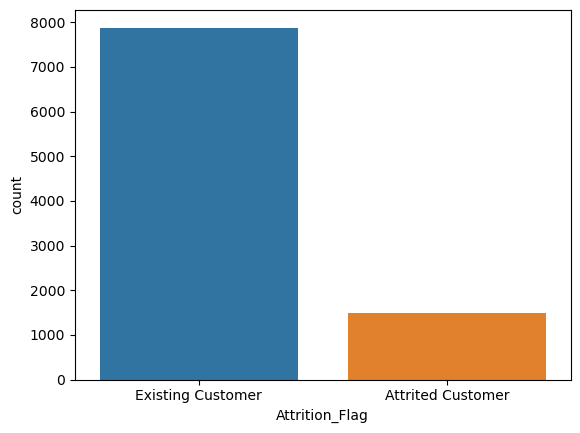

In [25]:
# Plot the count of each value in the "Attrition_Flag" column before binary mapping
sns.countplot(x='Attrition_Flag', data=credit_card_user_churn_data)

In [26]:
# Apply Binary mapping function to "Attrition_Flag" column
credit_card_user_churn_data = binary_encoding(credit_card_user_churn_data, column='Attrition_Flag', positive_value='Attrited Customer')

<AxesSubplot:xlabel='Attrition_Flag', ylabel='count'>

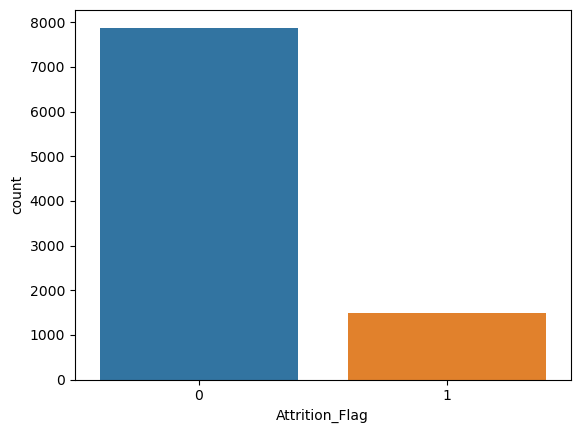

In [27]:
# Plot the count of each value in the "Attrition_Flag" column after binary mapping
sns.countplot(x='Attrition_Flag', data=credit_card_user_churn_data)

<AxesSubplot:xlabel='Gender', ylabel='count'>

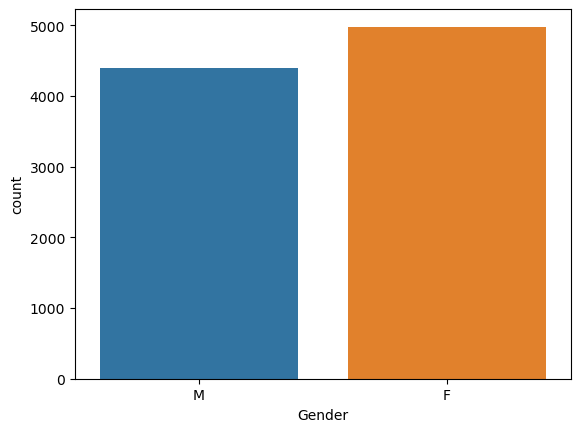

In [28]:
# Plot the count of each value in the "Gender" column before binary mapping
sns.countplot(x='Gender', data=credit_card_user_churn_data)

In [29]:
# Apply Binary mapping function to "Gender" column
credit_card_user_churn_data = binary_encoding(credit_card_user_churn_data, column='Gender', positive_value='M')

<AxesSubplot:xlabel='Gender', ylabel='count'>

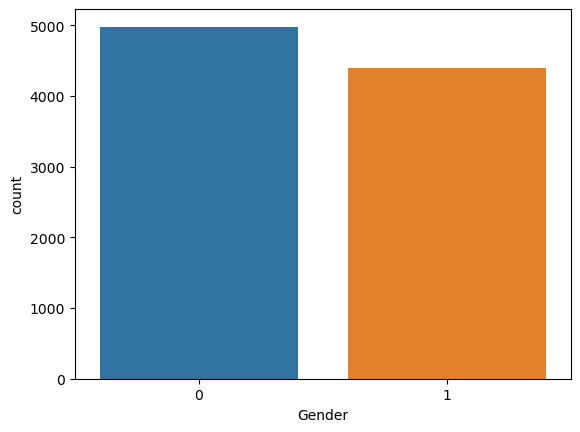

In [30]:
# Plot the count of each value in the "Gender" column after binary mapping
sns.countplot(x='Gender', data=credit_card_user_churn_data)

In [31]:
# Checking unique values in "Education_Level" column
credit_card_user_churn_data['Education_Level'].unique()

array(['High School', 'Graduate', 'Uneducated', 'College',
       'Post-Graduate', 'Doctorate'], dtype=object)

<AxesSubplot:xlabel='Attrition_Flag', ylabel='count'>

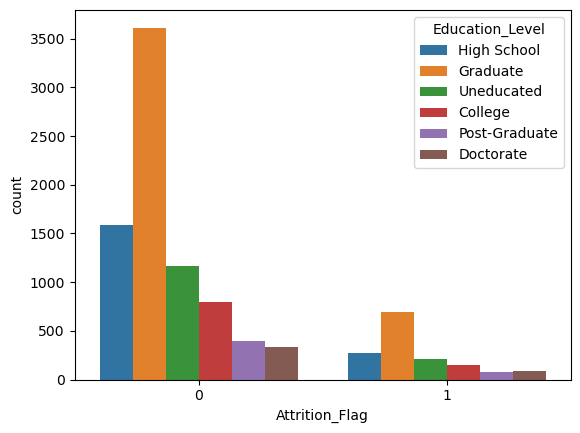

In [32]:
# Using Seaborn to create a countplot showing the relationship between Attrition_Flag and education level
sns.countplot(x='Attrition_Flag' ,hue='Education_Level',data=credit_card_user_churn_data)

In [33]:
# Count the number of unique categories in the "Education_Level" column
len(credit_card_user_churn_data['Education_Level'].value_counts())

6

In [34]:
# Count the number of unique values in the "Education_Level" column
credit_card_user_churn_data['Education_Level'].value_counts()

Graduate         4306
High School      1859
Uneducated       1378
College           939
Post-Graduate     473
Doctorate         423
Name: Education_Level, dtype: int64

In [35]:
# This code adds a function to modify the "Education_Level" column, replacing "Post-Graduate" and "Doctorate" values with "Other"
def add_education_level(inpt):
    if inpt == 'Post-Graduate' or inpt == 'Doctorate':
        return 'Other'
    else:
        return inpt

In [36]:
# Plot the count of each value in the "Education_Level" column after adding 'Other' category
credit_card_user_churn_data['Education_Level'] = credit_card_user_churn_data['Education_Level'].apply(add_education_level)

In [37]:
# Check the count of each unique value in the "Education_Level" column after mapping
credit_card_user_churn_data['Education_Level'].value_counts()

Graduate       4306
High School    1859
Uneducated     1378
College         939
Other           896
Name: Education_Level, dtype: int64

In [38]:
# Do one-hot encoding for "Education_Level" column
credit_card_user_churn_data=pd.get_dummies(credit_card_user_churn_data, columns=['Education_Level'])

In [39]:
# Verify one-hot encoding of "Education_Level" column by checking the first 5 rows of the updated dataset, 
# which should now contain new binary columns for each unique value in the original column.
credit_card_user_churn_data.head()

,Attrition_Flag,Customer_Age,Gender,Dependent_count,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,...,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Education_Level_College,Education_Level_Graduate,Education_Level_High School,Education_Level_Other,Education_Level_Uneducated
0,0,45,1,3,Married,$60K - $80K,Blue,39,5,1,...,1.335,1144,42,1.625,0.061,0,0,1,0,0
1,0,49,0,5,Single,Less than $40K,Blue,44,6,1,...,1.541,1291,33,3.714,0.105,0,1,0,0,0
2,0,51,1,3,Married,$80K - $120K,Blue,36,4,1,...,2.594,1887,20,2.333,0.000,0,1,0,0,0
4,0,40,1,3,Married,$60K - $80K,Blue,21,5,1,...,2.175,816,28,2.500,0.000,0,0,0,0,1
5,0,44,1,2,Married,$40K - $60K,Blue,36,3,1,...,1.376,1088,24,0.846,0.311,0,1,0,0,0


<AxesSubplot:xlabel='Attrition_Flag', ylabel='count'>

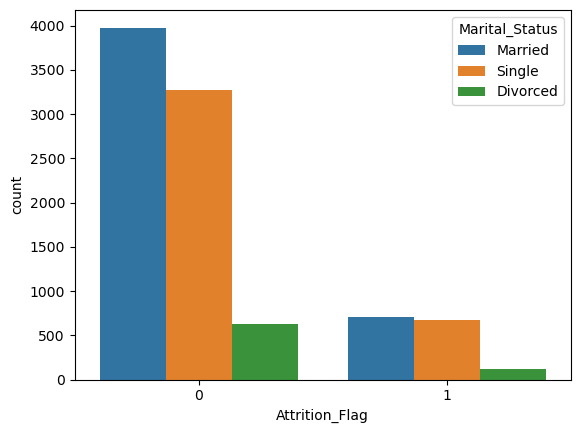

In [40]:
# Using Seaborn to create a countplot showing the relationship between "Attrition_Flag" and "Marital_Status"
sns.countplot(x='Attrition_Flag' ,hue='Marital_Status',data=credit_card_user_churn_data)

In [41]:
# Count the number of unique categories in the "Marital_Status" column
len(credit_card_user_churn_data['Marital_Status'].value_counts())

3

In [42]:
# Count the number of unique values in the "Marital_Status" column
credit_card_user_churn_data['Marital_Status'].value_counts()

Married     4687
Single      3943
Divorced     748
Name: Marital_Status, dtype: int64

In [43]:
# Define a function to preprocess "Marital_Status" column
def preprocess_marital_status(data):
    # create dummy variables for the 'Marital_Status' variable
    marital_dummies = pd.get_dummies(data['Marital_Status'])

    # add the dummy variables to the dataset
    data = pd.concat([data, marital_dummies], axis=1)

    # drop the original 'Marital_Status' variable from the dataset
    data.drop('Marital_Status', axis=1, inplace=True)

    return data

In [44]:
# Apply "preprocess_marital_status" function to "Marital_Status" column
credit_card_user_churn_data = preprocess_marital_status(credit_card_user_churn_data)

In [45]:
# Check after applying "preprocess_marital_status" function to "Marital_Status" column
credit_card_user_churn_data.head()

,Attrition_Flag,Customer_Age,Gender,Dependent_count,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,...,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Education_Level_College,Education_Level_Graduate,Education_Level_High School,Education_Level_Other,Education_Level_Uneducated,Divorced,Married,Single
0,0,45,1,3,$60K - $80K,Blue,39,5,1,3,...,1.625,0.061,0,0,1,0,0,0,1,0
1,0,49,0,5,Less than $40K,Blue,44,6,1,2,...,3.714,0.105,0,1,0,0,0,0,0,1
2,0,51,1,3,$80K - $120K,Blue,36,4,1,0,...,2.333,0.000,0,1,0,0,0,0,1,0
4,0,40,1,3,$60K - $80K,Blue,21,5,1,0,...,2.500,0.000,0,0,0,0,1,0,1,0
5,0,44,1,2,$40K - $60K,Blue,36,3,1,2,...,0.846,0.311,0,1,0,0,0,0,1,0


In [46]:
# Count the number of unique values in the "Income_Category" column
credit_card_user_churn_data['Income_Category'].value_counts()

Less than $40K    4341
$40K - $60K       1658
$80K - $120K      1399
$60K - $80K       1300
$120K +            680
Name: Income_Category, dtype: int64

<AxesSubplot:xlabel='Attrition_Flag', ylabel='count'>

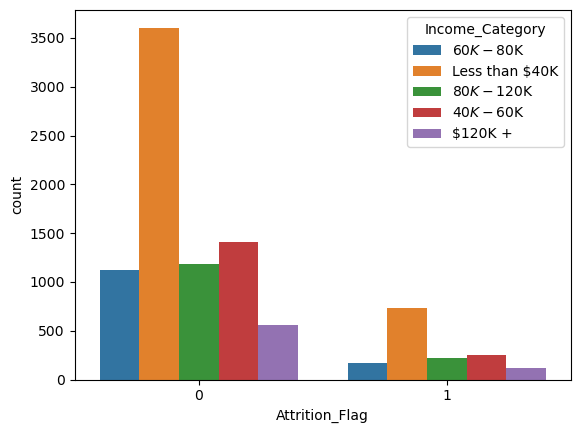

In [47]:
# Using Seaborn to create a countplot showing the relationship between "Attrition_Flag" and "Income_Category"
sns.countplot(x='Attrition_Flag' ,hue='Income_Category',data=credit_card_user_churn_data)

In [48]:
# Define a function to preprocess "Income_Category" column
def preprocess_income_category(data):
    # Maps the income categories to ordinal values using a dictionary, and applies the mapping to the 'Income_Category' column using the apply() method with a lambda function.
    income_map = {'Less than $40K': 0, '$40K - $60K': 1, '$60K - $80K': 2, '$80K - $120K': 3, '$120K +': 4}
    
    data['Income_Category'] = data['Income_Category'].apply(lambda x: income_map[x])

    return data

In [49]:
# Apply "preprocess_income_category" function to "Income_Category" column
credit_card_user_churn_data = preprocess_income_category(credit_card_user_churn_data)

In [50]:
credit_card_user_churn_data

,Attrition_Flag,Customer_Age,Gender,Dependent_count,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,...,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Education_Level_College,Education_Level_Graduate,Education_Level_High School,Education_Level_Other,Education_Level_Uneducated,Divorced,Married,Single
0,0,45,1,3,2,Blue,39,5,1,3,...,1.625,0.061,0,0,1,0,0,0,1,0
1,0,49,0,5,0,Blue,44,6,1,2,...,3.714,0.105,0,1,0,0,0,0,0,1
2,0,51,1,3,3,Blue,36,4,1,0,...,2.333,0.000,0,1,0,0,0,0,1,0
4,0,40,1,3,2,Blue,21,5,1,0,...,2.500,0.000,0,0,0,0,1,0,1,0
5,0,44,1,2,1,Blue,36,3,1,2,...,0.846,0.311,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10121,0,56,0,1,0,Blue,50,4,1,4,...,0.791,0.164,0,1,0,0,0,0,0,1
10122,0,50,1,2,1,Blue,40,3,2,3,...,0.857,0.462,0,1,0,0,0,0,0,1
10123,1,41,1,2,1,Blue,25,4,2,3,...,0.683,0.511,0,1,0,0,0,1,0,0
10124,1,44,0,1,0,Blue,36,5,3,4,...,0.818,0.000,0,0,1,0,0,0,1,0


In [51]:
# Count the number of unique values in the "Card_Category" column
credit_card_user_churn_data['Card_Category'].value_counts()

Blue        8753
Silver       503
Gold         104
Platinum      18
Name: Card_Category, dtype: int64

<AxesSubplot:xlabel='Attrition_Flag', ylabel='count'>

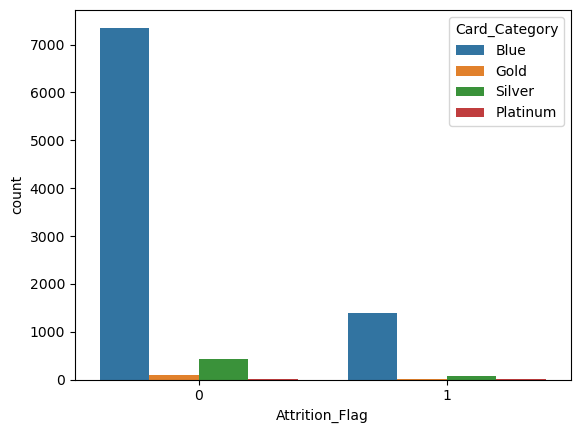

In [52]:
# Using Seaborn to create a countplot showing the relationship between "Attrition_Flag" and "Card_Category"
sns.countplot(x='Attrition_Flag' ,hue='Card_Category',data=credit_card_user_churn_data)

In [53]:
# Define a function to preprocess "Card_Category" column
def preprocess_card_category(data):
    # Applies one-hot encoding to the 'Card_Category' column of the dataframe 'customer_curn_data', creating a new binary column for each unique value in the original column.
    data = pd.get_dummies(data, columns=['Card_Category'])

    return data

In [54]:
# Apply "preprocess_income_category" function to "Card_Category" column
credit_card_user_churn_data = preprocess_card_category(credit_card_user_churn_data)

In [55]:
credit_card_user_churn_data

,Attrition_Flag,Customer_Age,Gender,Dependent_count,Income_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,...,Education_Level_High School,Education_Level_Other,Education_Level_Uneducated,Divorced,Married,Single,Card_Category_Blue,Card_Category_Gold,Card_Category_Platinum,Card_Category_Silver
0,0,45,1,3,2,39,5,1,3,12691.0,...,1,0,0,0,1,0,1,0,0,0
1,0,49,0,5,0,44,6,1,2,8256.0,...,0,0,0,0,0,1,1,0,0,0
2,0,51,1,3,3,36,4,1,0,3418.0,...,0,0,0,0,1,0,1,0,0,0
4,0,40,1,3,2,21,5,1,0,4716.0,...,0,0,1,0,1,0,1,0,0,0
5,0,44,1,2,1,36,3,1,2,4010.0,...,0,0,0,0,1,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10121,0,56,0,1,0,50,4,1,4,3688.0,...,0,0,0,0,0,1,1,0,0,0
10122,0,50,1,2,1,40,3,2,3,4003.0,...,0,0,0,0,0,1,1,0,0,0
10123,1,41,1,2,1,25,4,2,3,4277.0,...,0,0,0,1,0,0,1,0,0,0
10124,1,44,0,1,0,36,5,3,4,5409.0,...,1,0,0,0,1,0,1,0,0,0


In [56]:
# Check the shape of dataframe after preprocessing
credit_card_user_churn_data.shape

(9378, 29)

In [57]:
# Check for null values and data types after preprocessing
credit_card_user_churn_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9378 entries, 0 to 10126
Data columns (total 29 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Attrition_Flag               9378 non-null   int64  
 1   Customer_Age                 9378 non-null   int64  
 2   Gender                       9378 non-null   int64  
 3   Dependent_count              9378 non-null   int64  
 4   Income_Category              9378 non-null   int64  
 5   Months_on_book               9378 non-null   int64  
 6   Total_Relationship_Count     9378 non-null   int64  
 7   Months_Inactive_12_mon       9378 non-null   int64  
 8   Contacts_Count_12_mon        9378 non-null   int64  
 9   Credit_Limit                 9378 non-null   float64
 10  Total_Revolving_Bal          9378 non-null   int64  
 11  Avg_Open_To_Buy              9378 non-null   float64
 12  Total_Amt_Chng_Q4_Q1         9378 non-null   float64
 13  Total_Trans_Amt  

# Seprating dependent & independent variables

In [58]:
# Independent variable
x=credit_card_user_churn_data.drop(['Attrition_Flag'],axis=1) 

# Dependent variable
y=credit_card_user_churn_data['Attrition_Flag']   

In [59]:
# Scale X with a standard scaler
scaler = StandardScaler()
x = pd.DataFrame(scaler.fit_transform(x), columns=x.columns)

In [60]:
x

,Customer_Age,Gender,Dependent_count,Income_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,...,Education_Level_High School,Education_Level_Other,Education_Level_Uneducated,Divorced,Married,Single,Card_Category_Blue,Card_Category_Gold,Card_Category_Platinum,Card_Category_Silver
0,-0.171193,1.063656,0.514586,0.600185,0.374602,0.764179,-1.331567,0.488275,0.455836,-0.474397,...,2.011131,-0.325016,-0.415030,-0.294405,1.000427,-0.851753,0.267215,-0.105897,-0.043853,-0.238067
1,0.322715,-0.940154,2.052686,-0.884721,0.996332,1.409982,-1.331567,-0.413111,-0.034375,-0.367533,...,-0.497233,-0.325016,-0.415030,-0.294405,-0.999574,1.174049,0.267215,-0.105897,-0.043853,-0.238067
2,0.569669,1.063656,0.514586,1.342638,0.001565,0.118377,-1.331567,-2.215883,-0.569131,-1.428794,...,-0.497233,-0.325016,-0.415030,-0.294405,1.000427,-0.851753,0.267215,-0.105897,-0.043853,-0.238067
3,-0.788578,1.063656,0.514586,0.600185,-1.863625,0.764179,-1.331567,-2.215883,-0.425660,-1.428794,...,-0.497233,-0.325016,2.409464,-0.294405,1.000427,-0.851753,0.267215,-0.105897,-0.043853,-0.238067
4,-0.294670,1.063656,-0.254464,-0.142268,0.001565,-0.527426,-1.331567,-0.413111,-0.503696,0.102910,...,-0.497233,-0.325016,-0.415030,-0.294405,1.000427,-0.851753,0.267215,-0.105897,-0.043853,-0.238067
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9373,1.187054,-0.940154,-1.023514,-0.884721,1.742408,0.118377,-1.331567,1.389661,-0.539287,-0.684438,...,-0.497233,-0.325016,-0.415030,-0.294405,-0.999574,1.174049,0.267215,-0.105897,-0.043853,-0.238067
9374,0.446192,1.063656,-0.254464,-0.142268,0.498948,-0.527426,-0.339792,0.488275,-0.504469,0.844809,...,-0.497233,-0.325016,-0.415030,-0.294405,-0.999574,1.174049,0.267215,-0.105897,-0.043853,-0.238067
9375,-0.665101,1.063656,-0.254464,-0.142268,-1.366241,0.118377,-0.339792,0.488275,-0.474183,1.256294,...,-0.497233,-0.325016,-0.415030,3.396680,-0.999574,-0.851753,0.267215,-0.105897,-0.043853,-0.238067
9376,-0.294670,-0.940154,-1.023514,-0.884721,0.001565,0.764179,0.651983,1.389661,-0.349061,-1.428794,...,2.011131,-0.325016,-0.415030,-0.294405,1.000427,-0.851753,0.267215,-0.105897,-0.043853,-0.238067


In [61]:
y

0        0
1        0
2        0
4        0
5        0
        ..
10121    0
10122    0
10123    1
10124    1
10126    1
Name: Attrition_Flag, Length: 9378, dtype: int64

# Training

In [62]:
# Splitting the dataset for training and testing
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.8, random_state=123)

In [63]:
# Printing shape after splitting the datset
print(x_train.shape, '-----> Training Features Shape')
print(x_test.shape,  '-----> Testing Features Shape')
print(y_train.shape, '-----> Training Lebel Shape')
print(y_test.shape,  '-----> Testing Lebel Shape') 

(7502, 28) -----> Training Features Shape
(1876, 28) -----> Testing Features Shape
(7502,) -----> Training Lebel Shape
(1876,) -----> Testing Lebel Shape


In [64]:
# Defining the models to be used
models = [
    LogisticRegression(),
    SVC(),
    DecisionTreeClassifier(),
    RandomForestClassifier()
]

for model in models:
    model.fit(x_train, y_train)

In [65]:
# Providing model names to show the results
model_names = [
    "   Logistic Regression",
    "Support Vector Machine",
    "         Decision Tree",
    "         Random Forest"
]

for model, name in zip(models, model_names):
    print(name + ": {:.4f}%".format(model.score(x_test, y_test) * 100))

   Logistic Regression: 89.4989%
Support Vector Machine: 92.2175%
         Decision Tree: 93.6567%
         Random Forest: 95.8955%


In [66]:
# Using the trained Logistic Regression model to predict
y_pred = models[0].predict(x_test)
# Printing the predicted values
y_pred

array([0, 0, 1, ..., 0, 0, 0], dtype=int64)

In [67]:
# Using the trained Support Vector Machine model to predict
y_pred = models[1].predict(x_test)
# Printing the predicted values
y_pred

array([0, 0, 1, ..., 0, 0, 0], dtype=int64)

In [68]:
# Using the trained Decision Tree model to predict
y_pred = models[2].predict(x_test)
# Printing the predicted values
y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [69]:
# Using the trained Random Forest model to predict
y_pred = models[3].predict(x_test)
# Printing the predicted values
y_pred

array([0, 0, 1, ..., 0, 0, 0], dtype=int64)

# Hyperparameter Tuning 

## 1. LogisticRegression

Best Hyperparameters: {'C': 1, 'penalty': 'l2'}

              precision    recall  f1-score   support

           0       0.92      0.96      0.94      1565
           1       0.74      0.57      0.64       311

    accuracy                           0.89      1876
   macro avg       0.83      0.76      0.79      1876
weighted avg       0.89      0.89      0.89      1876

Confusion:
[[1502   63]
 [ 134  177]]


C:\Users\DELL\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
15 fits failed out of a total of 30.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
15 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\DELL\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\DELL\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1461, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\DELL\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 447, in _check_solver
    raise ValueError(
ValueErr

Text(113.9222222222222, 0.5, 'Predicted Class')

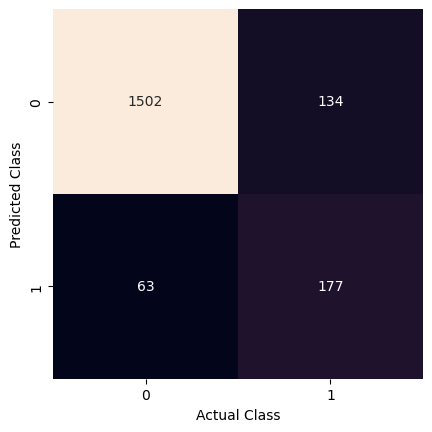

In [70]:
# Define logistic regression model
logreg = LogisticRegression(random_state=123)

# Define hyperparameter grid to search
param_grid = {'C': [0.1, 1, 10],
              'penalty': ['l1', 'l2']}

# Create GridSearchCV object
grid_search = GridSearchCV(logreg, param_grid, cv=5)

# Fit GridSearchCV object to training data
grid_search.fit(x_train, y_train)

# Print best hyperparameters
print("Best Hyperparameters:", grid_search.best_params_)
print("")

# Make predictions on test data using best estimator
logreg_best = grid_search.best_estimator_
log_prediction = logreg_best.predict(x_test)

# Print classification report and confusuin matrix
print(classification_report(y_test, log_prediction))
print("Confusion:")
cm = confusion_matrix(y_test, log_prediction)
print(cm)
sns.heatmap(cm.T, square=True, annot=True, fmt='d', cbar=False)
plt.xlabel('Actual Class')
plt.ylabel('Predicted Class')

## 2. Support Vector Machine

Best Hyperparameters: {'C': 10, 'gamma': 'scale', 'kernel': 'rbf'}

              precision    recall  f1-score   support

           0       0.95      0.97      0.96      1565
           1       0.82      0.74      0.78       311

    accuracy                           0.93      1876
   macro avg       0.88      0.85      0.87      1876
weighted avg       0.93      0.93      0.93      1876

Confusion:
[[1515   50]
 [  82  229]]


Text(113.9222222222222, 0.5, 'Predicted Class')

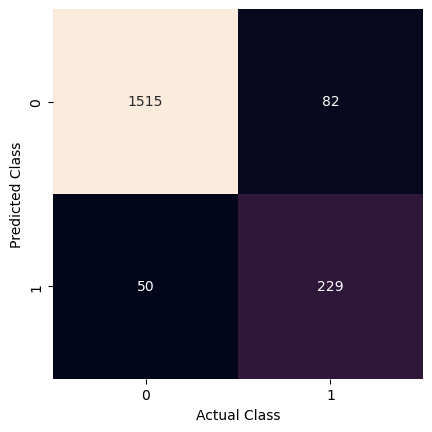

In [71]:
# Define the hyperparameter grid to search
param_grid = {'C': [0.1, 1, 10],
              'kernel': ['linear', 'rbf', 'sigmoid'],
              'gamma': ['scale', 'auto']}

# Create a SVM object
svm = SVC(random_state=123)

# Create a GridSearchCV object
grid_search = GridSearchCV(svm, param_grid, cv=5)

# Fit the GridSearchCV object to the training data
grid_search.fit(x_train, y_train)

# Print the best hyperparameters
print("Best Hyperparameters:", grid_search.best_params_)
print("")

# Make predictions on the test data using the best estimator
svm_best = grid_search.best_estimator_
svm_prediction = svm_best.predict(x_test)

# Print the classification report and confusion matrix
print(classification_report(y_test, svm_prediction))
print("Confusion:")
cm = confusion_matrix(y_test, svm_prediction)
print(cm)
sns.heatmap(cm.T, square=True, annot=True, fmt='d', cbar=False)
plt.xlabel('Actual Class')
plt.ylabel('Predicted Class')

## 3. Decision Tree

Best Hyperparameters: {'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 10}

              precision    recall  f1-score   support

           0       0.96      0.97      0.96      1565
           1       0.83      0.79      0.81       311

    accuracy                           0.94      1876
   macro avg       0.89      0.88      0.89      1876
weighted avg       0.94      0.94      0.94      1876

Confusion:
[[1515   50]
 [  65  246]]


Text(113.9222222222222, 0.5, 'Predicted Class')

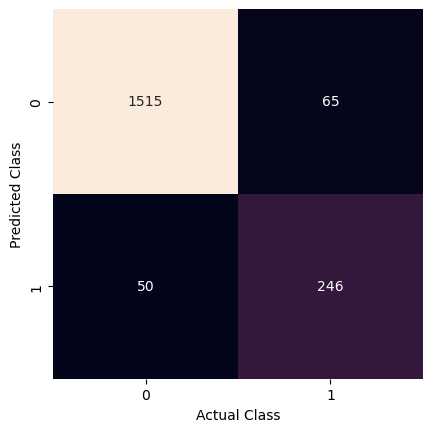

In [72]:
# Define the hyperparameter grid to search
param_grid = {'max_depth': [3, 5, 10],
              'min_samples_split': [2, 5, 10],
              'min_samples_leaf': [1, 2, 4]}

# Create a DecisionTreeClassifier object with random_state=123
dtc = DecisionTreeClassifier(random_state=123)

# Create a GridSearchCV object
grid_search = GridSearchCV(dtc, param_grid, cv=5)

# Fit the GridSearchCV object to the training data
grid_search.fit(x_train, y_train)

# Print the best hyperparameters
print("Best Hyperparameters:", grid_search.best_params_)
print("")

# Make predictions on the test data using the best estimator
dtc_best = grid_search.best_estimator_
dtc_prediction = dtc_best.predict(x_test)

# Print the classification report and confusion matrix
print(classification_report(y_test, dtc_prediction))
print("Confusion:")
cm = confusion_matrix(y_test, dtc_prediction)
print(cm)
sns.heatmap(cm.T, square=True, annot=True, fmt='d', cbar=False)
plt.xlabel('Actual Class')
plt.ylabel('Predicted Class')

## 4. Random Forest

Best Hyperparameters: {'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 500}

              precision    recall  f1-score   support

           0       0.96      0.99      0.98      1565
           1       0.92      0.82      0.87       311

    accuracy                           0.96      1876
   macro avg       0.94      0.90      0.92      1876
weighted avg       0.96      0.96      0.96      1876

Confusion:
[[1544   21]
 [  56  255]]


Text(113.9222222222222, 0.5, 'Predicted Class')

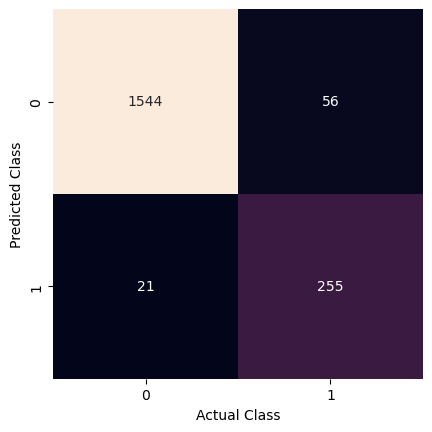

In [73]:
# Define the hyperparameter grid to search
param_grid = {'n_estimators': [100, 300, 500],
              'max_depth': [5, 10, 20],
              'min_samples_split': [2, 5, 10],
              'min_samples_leaf': [1, 2, 4]}

# Create a RandomForestClassifier object with random_state=123
rfc = RandomForestClassifier(random_state=123)

# Create a GridSearchCV object
grid_search = GridSearchCV(rfc, param_grid, cv=5)

# Fit the GridSearchCV object to the training data
grid_search.fit(x_train, y_train)

# Print the best hyperparameters
print("Best Hyperparameters:", grid_search.best_params_)
print("")

# Make predictions on the test data using the best estimator
rfc_best = grid_search.best_estimator_
rfc_prediction = rfc_best.predict(x_test)

# Print the classification report and confusion matrix
print(classification_report(y_test, rfc_prediction))
print("Confusion:")
cm = confusion_matrix(y_test, rfc_prediction)
print(cm)
sns.heatmap(cm.T, square=True, annot=True, fmt='d', cbar=False)
plt.xlabel('Actual Class')
plt.ylabel('Predicted Class')

# Comparison of Models

In [74]:
report = [["Logistic Regression", 0.89, 0.89, 0.89, 0.89], ["Support Vector Machine", 0.93, 0.93, 0.93, 0.93], 
 ["Decision Tree", 0.94, 0.94, 0.94, 0.94],
 ["Random Forest", 0.96, 0.96, 0.96, 0.96]]
result = pd.DataFrame(report, columns=["Model", "Accuracy Score", "Precision", "Recall", "F1-score"])
result.sort_values("Accuracy Score", ascending=False)

,Model,Accuracy Score,Precision,Recall,F1-score
3,Random Forest,0.96,0.96,0.96,0.96
2,Decision Tree,0.94,0.94,0.94,0.94
1,Support Vector Machine,0.93,0.93,0.93,0.93
0,Logistic Regression,0.89,0.89,0.89,0.89
